In [1]:
import numpy as np

import matplotlib.pyplot as plt
import os
#from NanoFan import *
from scipy.optimize import curve_fit
from scipy import optimize
from scipy.interpolate import CubicSpline
#import gdstk
import csv
import pandas as pd
import tidy3d as td
from tidy3d import web
from TMM import *
from NanoParse import *

from IPython.display import Image, display

This notebook aims to find the optical metal configuration for a large Goos-Hanchen shift in infra-red. 

In [13]:
#infra-red 1100nm

k_vals = np.linspace(0,10,100)
metal_list= (1e-9 + k_vals*1j )

#defining metal thickness, and dielectric permitivities to use
metal_thick = crit_thick(wavelength=1100e-9, n_metal=(0.27750 + 7.2433j))
water_nk_ir =1.3270
sapphire_ir= 1.7538
air=1

There seems generally to be a large order of magnitude increase for low values of n and relativey high values of k. Specifically in infra-red.

The long operating wavelengths allow larger extinction coefficients :

$$
I(z) = I_0 \exp\left( -\frac{4 \pi k z}{\lambda} \right)
$$

$$
\alpha = \frac{4 \pi k}{\lambda}
$$

So infra-red wavelengths can support larger k values, due to their longer wavelengths limiting the absorption. This means the resonance condition is not broadened too much.

In [20]:
metal_thick

4.7798055881494804e-08

## Adjusting k values for n = 0

First lets test the effect of setting n to 0 and adjusting the extinction coefficient.

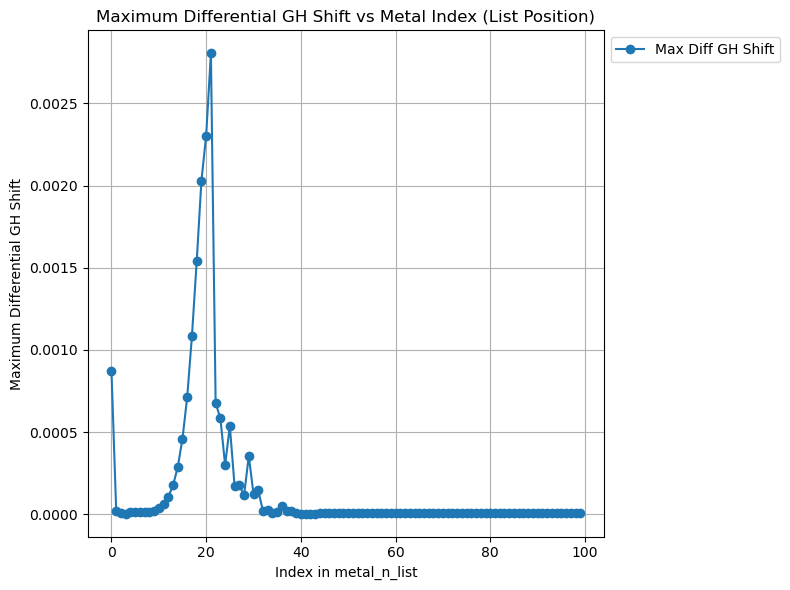

In [26]:
k_vals = np.linspace(0,50,100)
metal_list= (1e-9 + k_vals*1j )

gh,ind = scan_metal_n_list(metal_n_list=metal_list, start_angle = 0,end_angle=89,scans=10000,n_prism=sapphire_ir,
     n_sample=water_nk_ir,wavelength=1100e-9, tg=4.7798055881494804e-08
, ts=1e-20, ts_total=1e-11 ,layering='off', graphs='shift') #try using smaller ts 1e-9, 1e-10

At the n=0 condition, there is a strong correlation between extinction coefficient and lateral shift magnitude. One may think that by simply lowering extinction coefficient we sharpen the plasmon Q factor and therefore the lateral shift magnitude but this is not the case. If a method for dynamically tuning k at a value n=0 where established it would be feasible to massively increase lateral shift sensitvity.

Lets plot the lateral shift spectra of the perfect k value config.

In [32]:
ind*(50/100)

10.5

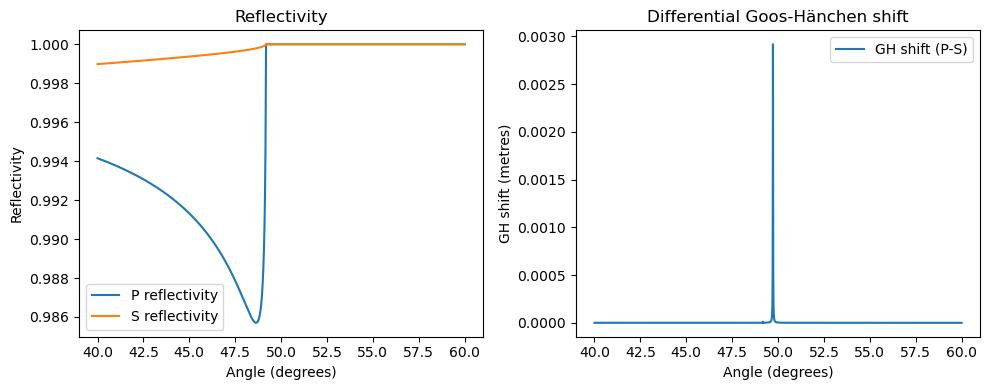

In [40]:
unw_pphas, unw_sphas ,sphas, pphas, sref, pref, gh_shift_p, gh_shift_s, diff_gh, angles = scan_anglex(start_angle = 40,end_angle=60,scans=100000,n1=sapphire_ir, n2=1e-10 +10.5*1j,
     n3=water_nk_ir,wavelength=1300e-9, tg=metal_thick, ts=1e-20, ts_total=1e-9 ,layering='off', plot='simple') #try using smaller ts 1e-9, 1e-10

Plotting the n = 0 metal for the optimal extinction coefficient gives a lateral shift value of 3mm, which is enormous compared to conventional lateral shift measurements. And with an unusually thin FWHM too. Interestingly whilst the surface plasmon FWHM is low, it does not approach 0 as usual.

In [39]:
print((0.003/633e-9)," lambda")

4739.336492890995  lambda


Lets see if the same is true for tuning n whilst k is at 0

In [ ]:
gh,ind = scan_metal_n_list(metal_n_list=metal_list, start_angle = 0,end_angle=89,scans=10000,n_prism=sapphire_ir,
     n_sample=water_nk_ir,wavelength=1100e-9, tg=4.7798055881494804e-08
, ts=1e-20, ts_total=1e-11 ,layering='off', graphs='shift') #try using smaller ts 1e-9, 1e-10

## Tuning n at k =0

We will choose the physical range of metals under IR light 

In [45]:
k_vals = np.linspace(0,5,100)
metal_list= (1e-9*1j + k_vals )

gh,ind = scan_metal_n_list(metal_n_list=metal_list, start_angle = 0,end_angle=89,scans=10000,n_prism=sapphire_ir,
     n_sample=water_nk_ir,wavelength=1100e-9, tg=4.7798055881494804e-08
, ts=1e-20, ts_total=1e-11 ,layering='off', graphs='shift') #try using smaller ts 1e-9, 1e-10

In [47]:
ind*(50/100)

0.0

There are no such similar peaks, and more importantly the highest value occurs at a low n value. It seems keeping n to be 0 is the optimum condition for 1100nm lateral shift sensing.

## K tuning for more values of n

It may now be a good idea to determine if n=0 is the optimal condition for k value tuning. We will use values of 0 to 5 which is the general range for metals in IR, we will allow k to go from 0 to 50

In [99]:
k_vals = np.linspace(0,50,100)
n_vals = np.linspace(1e-10,5,100)
large_list = np.array([])

steps = 100

for i in range(steps):
    metal_list= (n_vals[i] + k_vals*1j )
    large_list = np.append(large_list, metal_list)


In [ ]:

gh,ind = scan_metal_n_list(metal_n_list=large_list, start_angle = 0,end_angle=89,scans=10000,n_prism=sapphire_ir,
     n_sample=water_nk_ir,wavelength=1100e-9, tg=4.7798055881494804e-08
, ts=1e-20, ts_total=1e-11 ,layering='off', graphs='shift') #try using smaller ts 1e-9, 1e-10

For more values of n we see something suprising. n=0 really appears to be the optimum value for all k values, with the highest k value being in the first n = 0 peak. Furthermore the resonance condition for the lateral shift appears to be quite volatile and strongly dependent on k.

In [84]:
large_list[ind]

(1e-10+10.606060606060607j)

We see 0 + 10.606j is the optimal value for the largest lateral shift magnitude.

For every input wavelength, prism and sample it would be good to have a function that does a 3D paramater sweep. It could then find the optimal, n , k and thickness values for the metal. The search for the optimal configuration could be based on these metrics. Does the same pattern hold for 633nm

## At 633nm

In [85]:
gold_nk= (0.18344 + 3.4332j)
gold_perm = gold_nk**2
gold_thick = crit_thick(wavelength=633e-9, n_metal=(0.18344 + 3.4332j))
water = 1.3317**2
air=1

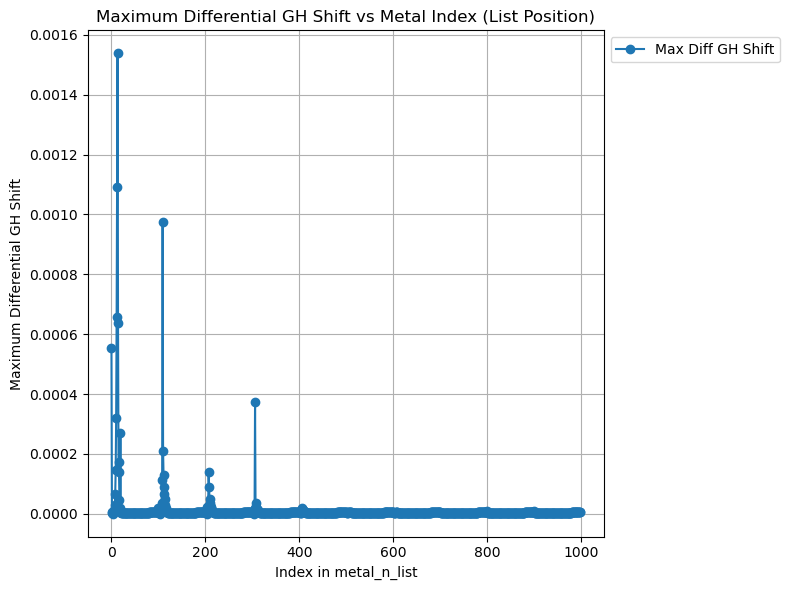

In [87]:
gh,ind = scan_metal_n_list(metal_n_list=large_list, start_angle = 0,end_angle=89,scans=10000,n_prism= 1.7659,
     n_sample=1.3317,wavelength=633e-9, tg=gold_thick
, ts=1e-20, ts_total=1e-11 ,layering='off', graphs='shift') #try using smaller ts 1e-9, 1e-10

There is one more paramater of the metal that must be adjusted for every wavelength, the thickness, doing a 3D paramater sweep of thickness, n and k values will allow complete optimization of the metal layer. This will be valid of course for a given wavelength prism and sample layer which must be fixed.

In [88]:
large_list[ind]

(1e-10+6.565656565656566j)

The effect seems to be the same for 633nm albeit at a different wavelength, the plotting for this however is not optimal perhaps it would be better to plot heatmaps. This will give us an idea of what values the peaks are clustered about.

In [92]:
import seaborn as sns

In [93]:
ind

13

In [98]:
large_list[100]

(0.050505050604040404+0j)